# Zadanie domowe -- interpolacja dwusześcienna

Interpolacja dwusześcienna, to podobnie jak w przypadku interpolacji dwuliniowej, rozszerzenie idei interpolacji jednowymiarowej na dwuwymiarową siatkę.
W trakcie jej obliczania wykorzystywane jest 16 pikseli z otoczenia (dla dwuliniowej 4).
Skutkuje to zwykle lepszymi wynikami - obraz wyjściowy jest bardziej gładki i z mniejszą liczbą artefaktów.
Ceną jest znaczny wzrost złożoności obliczeniowej (zostało to zaobserwowane podczas ćwiczenia).

Interpolacja dana jest wzorem:
\begin{equation}
I(x,y) = \sum_{i=0}^{3} \sum_{j=0}^{3} a_{ij} x^i y^j
\end{equation}

Zadanie sprowadza się zatem do wyznaczenia 16 współczynników $a_{ij}$.
W tym celu wykorzystuje się, oprócz wartość w puntach $A$ (0,0), $B$ (1 0), $C$ (1,1), $D$ (0,1) (por. rysunek dotyczący interpolacji dwuliniowej), także pochodne cząstkowe $A_x$, $A_y$, $A_{xy}$.
Pozwala to rozwiązać układ 16-tu równań.

Jeśli zgrupujemy parametry $a_{ij}$:
\begin{equation}
a = [ a_{00}~a_{10}~a_{20}~a_{30}~a_{01}~a_{11}~a_{21}~a_{31}~a_{02}~a_{12}~a_{22}~a_{32}~a_{03}~a_{13}~a_{23}~a_{33}]
\end{equation}

i przyjmiemy:
\begin{equation}
x = [A~B~D~C~A_x~B_x~D_x~C_x~A_y~B_y~D_y~C_y~A_{xy}~B_{xy}~D_{xy}~C_{xy}]^T
\end{equation}

To zagadnienie można opisać w postaci równania liniowego:
\begin{equation}
Aa = x
\end{equation}
gdzie macierz $A^{-1}$ dana jest wzorem:

\begin{equation}
A^{-1} =
\begin{bmatrix}
1& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0 \\
0&  0&  0&  0&  1&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0 \\
-3&  3&  0&  0& -2& -1&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0 \\
2& -2&  0&  0&  1&  1&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0&  1&  0&  0&  0&  0&  0&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  1&  0&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0& -3&  3&  0&  0& -2& -1&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0&  2& -2&  0&  0&  1&  1&  0&  0 \\
-3&  0&  3&  0&  0&  0&  0&  0& -2&  0& -1&  0&  0&  0&  0&  0 \\
0&  0&  0&  0& -3&  0&  3&  0&  0&  0&  0&  0& -2&  0& -1&  0 \\
9& -9& -9&  9&  6&  3& -6& -3&  6& -6&  3& -3&  4&  2&  2&  1 \\
-6&  6&  6& -6& -3& -3&  3&  3& -4&  4& -2&  2& -2& -2& -1& -1 \\
2&  0& -2&  0&  0&  0&  0&  0&  1&  0&  1&  0&  0&  0&  0&  0 \\
0&  0&  0&  0&  2&  0& -2&  0&  0&  0&  0&  0&  1&  0&  1&  0 \\
-6&  6&  6& -6& -4& -2&  4&  2& -3&  3& -3&  3& -2& -1& -2& -1 \\
4& -4& -4&  4&  2&  2& -2& -2&  2& -2&  2& -2&  1&  1&  1&  1 \\
\end{bmatrix}
\end{equation}

Potrzebne w rozważaniach pochodne cząstkowe obliczane są wg. następującego przybliżenia (przykład dla punktu A):
\begin{equation}
A_x = \frac{I(i+1,j) - I(i-1,j)}{2}
\end{equation}

\begin{equation}
A_y = \frac{I(i,j+1) - I(i,j-1)}{2}
\end{equation}

\begin{equation}
A_{xy} = \frac{I(i+1,j+1) - I(i-1,j) - I(i,j-1) + I(i,j)}{4}
\end{equation}

## Zadanie

Wykorzystując podane informacje zaimplementuj interpolację dwusześcienną.
Uwagi:
- macierz $A^{-1}$ dostępna jest w pliku *a_invert.py*
- trzeba się zastanowić nad potencjalnym wykraczaniem poza zakres obrazka (jak zwykle).

Ponadto dokonaj porównania liczby operacji arytmetycznych i dostępów do pamięci koniecznych przy realizacji obu metod interpolacji: dwuliniowej i dwusześciennej.

In [ ]:
import cv2
import os
import requests
from matplotlib import pyplot as plt
import numpy as np

url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/05_Resolution/'

fileName = "ainvert.py"
if not os.path.exists(fileName):
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)




In [2]:
def plot_img(I, title="", cmap='gray'):
    scale = 80
    plt.figure(figsize=(I.shape[0]/scale, I.shape[1]/scale), dpi=150)
    plt.imshow(I, cmap=cmap)
    plt.axis('off')
    plt.title(f"{title} ({I.shape[0]}x{I.shape[1]})")
    plt.show()

In [3]:
from ainvert import A_invert

def Px(I, i, j, y):
    p1x, p1y = i, min(j + 1, y - 1)
    p2x, p2y = i, max(j - 1, 0)
    return (I[p1x, p1y].astype(np.float64) - I[p2x, p2y]) / 2

def Py(I, i, j, x):
    p1x, p1y = min(i + 1, x - 1), j
    p2x, p2y = max(i - 1, 0), j
    return (I[p1x, p1y].astype(np.float64) - I[p2x, p2y]) / 2

def Pxy(I, i, j, x, y):
    p1x, p1y = min(i + 1, x - 1), min(j + 1, y - 1)
    p2x, p2y = max(i - 1, 0), j
    p3x, p3y = i, max(j - 1, 0)
    p4x, p4y = i, j
    return (I[p1x, p1y].astype(np.float64) - I[p2x, p2y] - I[p3x, p3y] + I[p4x, p4y]) / 4

def cubic_interpolation(I, s1, s2):
    x, y = I.shape
    new_x, new_y = int(x * s1), int(y * s2)

    new_I = np.zeros(shape=(new_x, new_y))
    for i in range(new_x):
        for j in range(new_y):
            A = (int(i / s1), int(j / s2))
            B = min(A[0], x - 1), min(A[1] + 1, y - 1)
            D = min(A[0] + 1, x - 1), min(A[1], y - 1)
            C = min(A[0] + 1, x - 1), min(A[1] + 1, y - 1)


            x_arr = np.array([I[A[0], A[1]], I[B[0], B[1]], I[D[0], D[1]], I[C[0], C[1]],
                         Px(I, A[0], A[1], y), Px(I, B[0], B[1], y), Px(I, D[0], D[1], y), Px(I, C[0], C[1], y),
                         Py(I, A[0], A[1], x), Py(I, B[0], B[1], x), Py(I, D[0], D[1], x), Py(I, C[0], C[1], x),
                         Pxy(I, A[0], A[1], x, y), Pxy(I, B[0], B[1], x, y), Pxy(I, D[0], D[1], x, y), Pxy(I, C[0], C[1], x, y)], dtype=np.float64)

            a = A_invert @ x_arr.T

            i_float, j_float = i / s1 - A[0], j / s2 - A[1]
            f = 0
            for ii in range(4):
                for jj in range(4):
                    f += a[4 * ii + jj] * i_float ** ii * j_float ** jj

            new_I[i, j] = int(f)

    return new_I

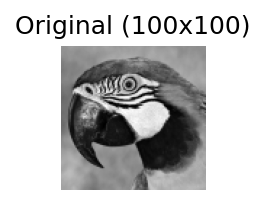

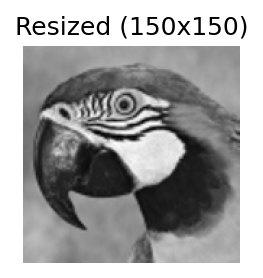

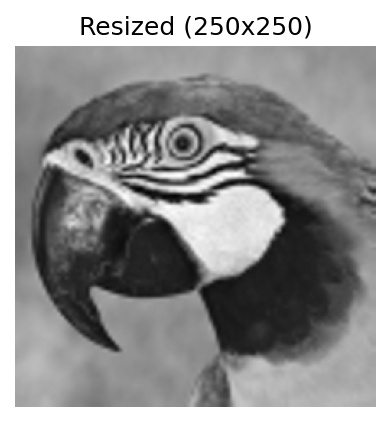

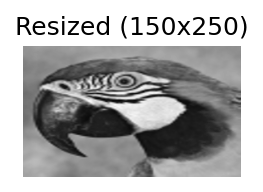

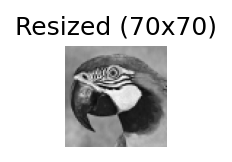

In [4]:
I_name = 'parrot.bmp'

params = [
    (1.5, 1.5),
    (2.5, 2.5),
    (1.5, 2.5),
    (0.7, 0.7)
]

I = cv2.imread(I_name)
I = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)
plot_img(I,  "Original")
for s1, s2 in params:
    plot_img(cubic_interpolation(I, s1, s2), "Resized")

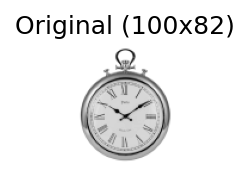

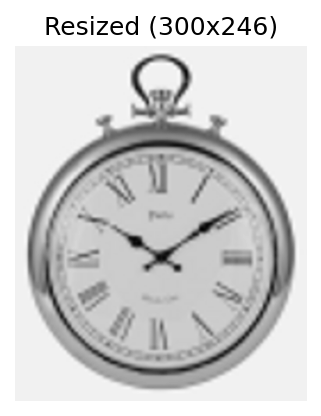

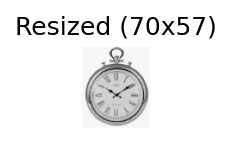

In [5]:
I_name = 'clock.bmp'

params = [
    (3, 3),
    (0.7, 0.7)
]

I = cv2.imread(I_name)
I = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)
plot_img(I, "Original")
for s1, s2 in params:
    plot_img(cubic_interpolation(I, s1, s2), "Resized")

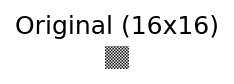

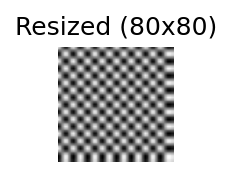

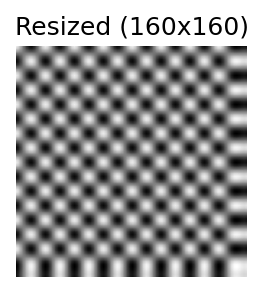

In [6]:
I_name = 'chessboard.bmp'

params = [
    (5, 5),
    (10, 10)
]

I = cv2.imread(I_name)
I = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)
plot_img(I, "Original")
for s1, s2 in params:
    plot_img(cubic_interpolation(I, s1, s2), "Resized")